# COMP 215 - Project 01

#### Name: Ben Blair
#### Date: 27/02/2023

#### Description:
This project allows the user to plot the close-approach record for the Near Earth Objects (NEOs) in a given date range.

## Import

In [106]:
import datetime, json, requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from pprint import pprint

## Parameters

> Start Date:

> End Date:

> Orbiting Body:

> Potentially Hazardous:

In [ ]:
API_KEY = 'GT5a6VBQVVTnT8H1jSPfja2DfDMaC1d0UsYeWsYW'  # Use DEMO_KEY if you do not have your own API key

start_date = '2023-02-14'  # YYYY-MM-DD
end_date = '2023-02-14'    # YYYY-MM-DD
orbiting_body = 'Earth'
only_hazardous = True

## Make a Query

In [ ]:
url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={API_KEY}'
response = requests.request("GET", url, headers={}, data={})
data = json.loads(response.text)

In [ ]:
neo_count = data['element_count']
neos = [neo for day in data['near_earth_objects'] for neo in data['near_earth_objects'][day]]

pprint(neos)

[{'absolute_magnitude_h': 19.82,
  'close_approach_data': [{'close_approach_date': '2023-02-14',
                           'close_approach_date_full': '2023-Feb-14 22:37',
                           'epoch_date_close_approach': 1676414220000,
                           'miss_distance': {'astronomical': '0.4795985639',
                                             'kilometers': '71746923.614498893',
                                             'lunar': '186.5638413571',
                                             'miles': '44581471.0637670034'},
                           'orbiting_body': 'Earth',
                           'relative_velocity': {'kilometers_per_hour': '104275.3251108074',
                                                 'kilometers_per_second': '28.9653680863',
                                                 'miles_per_hour': '64792.6318723237'}}],
  'estimated_diameter': {'feet': {'estimated_diameter_max': 2118.4832277896,
                                  'estimated

## Get Only Hazardous NEOs

In [ ]:
# TODO: Check if user wants all NEOs or just hazardous ones

neo_ids = [neo['id'] for neo in neos if neo['is_potentially_hazardous_asteroid'] == True]

pprint(neo_ids)

['2419880', '3840136', '54316644']


## Fetch Orbital Data for Each NEO

In [ ]:
def get_neo_data(id):
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}/?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    approaches = [(approach['close_approach_date'], float(approach['miss_distance']['kilometers'])) for approach in data['close_approach_data'] if approach['orbiting_body'] == orbiting_body]
    return approaches

In [ ]:
neo_datasets = {id:get_neo_data(id) for id in neo_ids}
pprint(neo_datasets)

{'2419880': [('1907-02-12', 30682925.241114773),
             ('1910-11-23', 42840783.48025458),
             ('1914-09-08', 27664306.71816039),
             ('2006-09-02', 73624686.96946383),
             ('2010-09-24', 29973599.53541521),
             ('2014-12-01', 25930369.358416393),
             ('2019-01-23', 15337001.32035814),
             ('2023-02-14', 71746923.6144989),
             ('2127-02-21', 46771294.35497006),
             ('2130-12-05', 41041800.84695629),
             ('2134-09-07', 37882454.081794634),
             ('2158-02-16', 31052164.60374172),
             ('2161-10-27', 43035178.716662034),
             ('2185-01-21', 25602209.855127398),
             ('2188-09-09', 30014023.90176618)],
 '3840136': [('1900-02-23', 13954510.227382226),
             ('1902-02-24', 13247076.500904338),
             ('1904-02-24', 12707258.885079665),
             ('1906-02-24', 12456575.056518791),
             ('1908-02-24', 12495468.961860731),
             ('1910-02-24', 12

## Plot the NEO Data

In [29]:
test_data = [('1907-02-12', 30682925.241114773),
             ('1910-11-23', 42840783.48025458),
             ('1914-09-08', 27664306.71816039),
             ('2006-09-02', 73624686.96946383),
             ('2010-09-24', 29973599.53541521),
             ('2014-12-01', 25930369.358416393),
             ('2019-01-23', 15337001.32035814),
             ('2023-02-14', 71746923.6144989),
             ('2127-02-21', 46771294.35497006),
             ('2130-12-05', 41041800.84695629),
             ('2134-09-07', 37882454.081794634),
             ('2158-02-16', 31052164.60374172),
             ('2161-10-27', 43035178.716662034),
             ('2185-01-21', 25602209.855127398),
             ('2188-09-09', 30014023.90176618)]

x = [datetime.date.fromisoformat(coord[0]) for coord in test_data]
y = [coord[1] for coord in test_data]

pprint(x)
pprint(y)

[datetime.date(1907, 2, 12),
 datetime.date(1910, 11, 23),
 datetime.date(1914, 9, 8),
 datetime.date(2006, 9, 2),
 datetime.date(2010, 9, 24),
 datetime.date(2014, 12, 1),
 datetime.date(2019, 1, 23),
 datetime.date(2023, 2, 14),
 datetime.date(2127, 2, 21),
 datetime.date(2130, 12, 5),
 datetime.date(2134, 9, 7),
 datetime.date(2158, 2, 16),
 datetime.date(2161, 10, 27),
 datetime.date(2185, 1, 21),
 datetime.date(2188, 9, 9)]
[30682925.241114773,
 42840783.48025458,
 27664306.71816039,
 73624686.96946383,
 29973599.53541521,
 25930369.358416393,
 15337001.32035814,
 71746923.6144989,
 46771294.35497006,
 41041800.84695629,
 37882454.081794634,
 31052164.60374172,
 43035178.716662034,
 25602209.855127398,
 30014023.90176618]


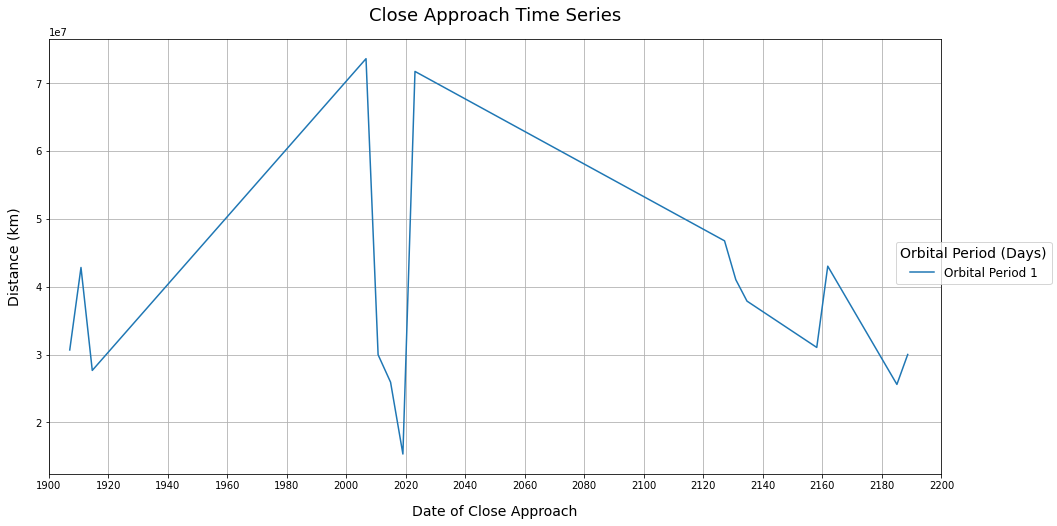

In [108]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('Close Approach Time Series', fontsize=18, pad=18)

ax.set_xlabel('Date of Close Approach', labelpad=14, fontsize=14)
ax.set_ylabel('Distance (km)', labelpad=14, fontsize=14)

locator = mdates.AutoDateLocator(maxticks=25)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlim(left=datetime.date(1900, 1, 1), right=datetime.date(2200, 1, 1))


ax.grid(True)
ax.plot(x, y, label='Orbital Period 1')  # TODO: Replace 'Orbital Period 1' with numerical value
fig.legend(title='Orbital Period (Days)', loc='right', title_fontsize=14, fontsize=12)

plt.show()